# Wrangling the Billboard Top 100

Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

* performer: who performed the song
* song: the title of the song
* year: year (1958 to 2021)
* week: chart week of that year (1, 2, etc)
* week_position: what position that song occupied that week on the Billboard top 100 chart.

Use your skills in data wrangling and plotting to answer the following three questions.

Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

Part B: Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

* You might find this easier to accomplish in two distinct sets of data wrangling steps.
* Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
* By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

Import all the required packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Upload the dataset and consider only the relative columns

In [2]:
df = pd.read_csv('Billboard.csv')

relevant_columns = ['performer','song','year','week','week_position']
df_rel = df[relevant_columns]
df_rel

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14
3,Patty Duke,Don't Just Stand There,1965,32,10
4,Patty Duke,Don't Just Stand There,1965,33,8
...,...,...,...,...,...
327890,Ariana Grande,God Is A Woman,2018,42,22
327891,Rose Royce,I Wanna Get Next To You,1977,21,22
327892,Eric Clapton And His Band,I Can't Stand It,1981,21,22
327893,Al Green,Here I Am Come & Take Me,1973,39,22


# Part A

Table of the top 10 most popular songs since 1958

In [3]:
num_weeks = df_rel.groupby('performer')['song'].value_counts()
num_weeks
columns = ['performer','song']
df_popular = df_rel[df_rel["song"].isin(num_weeks.index)][columns]
df_popular.drop_duplicates(inplace = True)
num_weeks_df = pd.DataFrame(num_weeks)
num_weeks_df.sort_values(by = 'count', ascending = False, inplace = True)
num_weeks_df.reset_index(inplace = True)
num_weeks_df.head(10)

,performer,song,count
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,Jason Mraz,I'm Yours,76
3,The Weeknd,Blinding Lights,76
4,LeAnn Rimes,How Do I Live,69
5,OneRepublic,Counting Stars,68
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,Adele,Rolling In The Deep,65
8,Jewel,Foolish Games/You Were Meant For Me,65
9,Carrie Underwood,Before He Cheats,64


# Part B

Musical diversity of the billboard

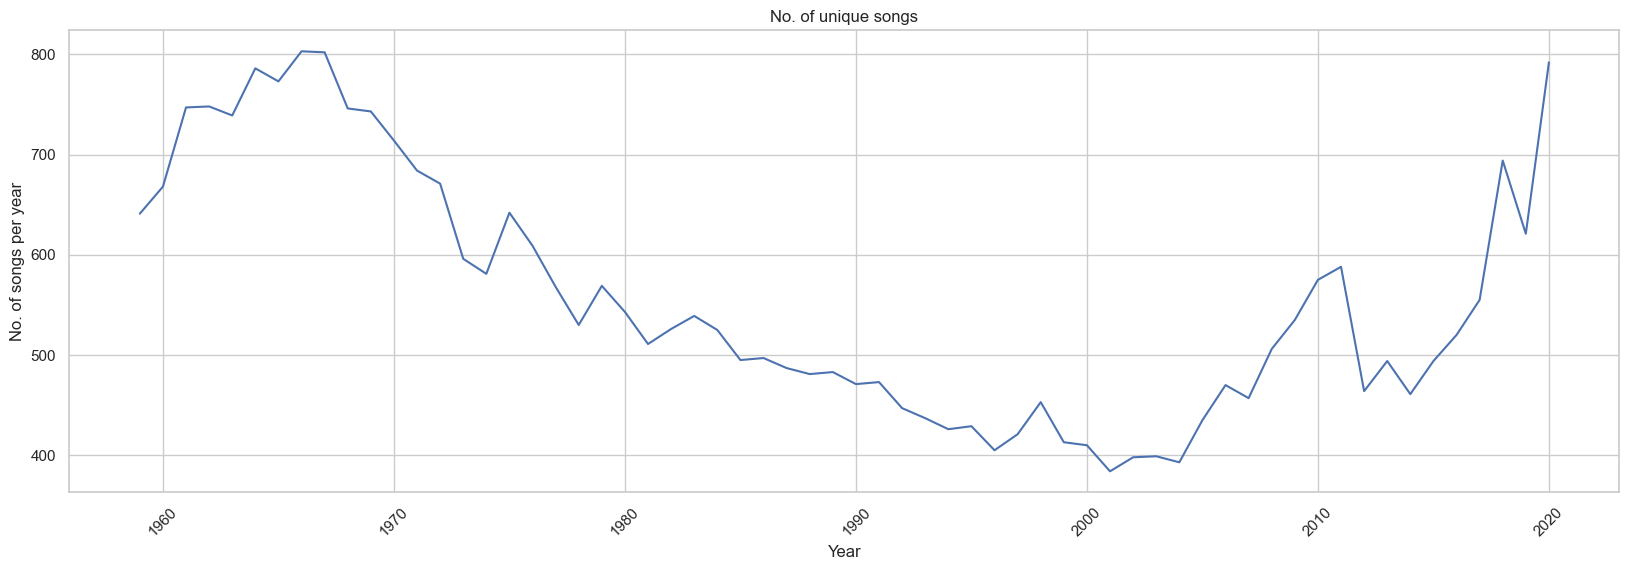

In [4]:
#filter and get the song data
num_songs = df[((df['year']>1958) & (df['year']<2021))].groupby('year')['song'].nunique()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.lineplot(x=num_songs.index, y=num_songs.values)#, palette="colorblind")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("No. of songs per year")
plt.title("No. of unique songs")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


* Analyzing the provided graph, we observe a notable decrease in the annual count of new music releases, starting from the 1980s the 2000s. This trend is intriguing, considering that the 80s presented us with a plethora of fantastic dance tracks! Nevertheless, the data illustrates a gradual decline, reaching its low around 2001-2002, followed by a sharp resurgence. However, this revival is subsequently succeeded by another short decline in 2012-2013.
* This phenomenon could be attributed to the introduction of the Billboard Top 100 chart in the 1950s. During that era, the music industry was characterized by a smaller pool of dominant artists and a larger proportion of struggling musicians. As time progressed into the 2000s, a wave of renowned and exceptionally talented artists emerged, thanks to their discovery and support by prominent producers. The music industry underwent transformation, leading to the idolization of artists by the public. This shift likely contributed to the observed rise in musical diversity.

# Part C

Ten Week Hits

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_14680\2445624729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_week.drop_duplicates(subset=['performer','song'], inplace=True)


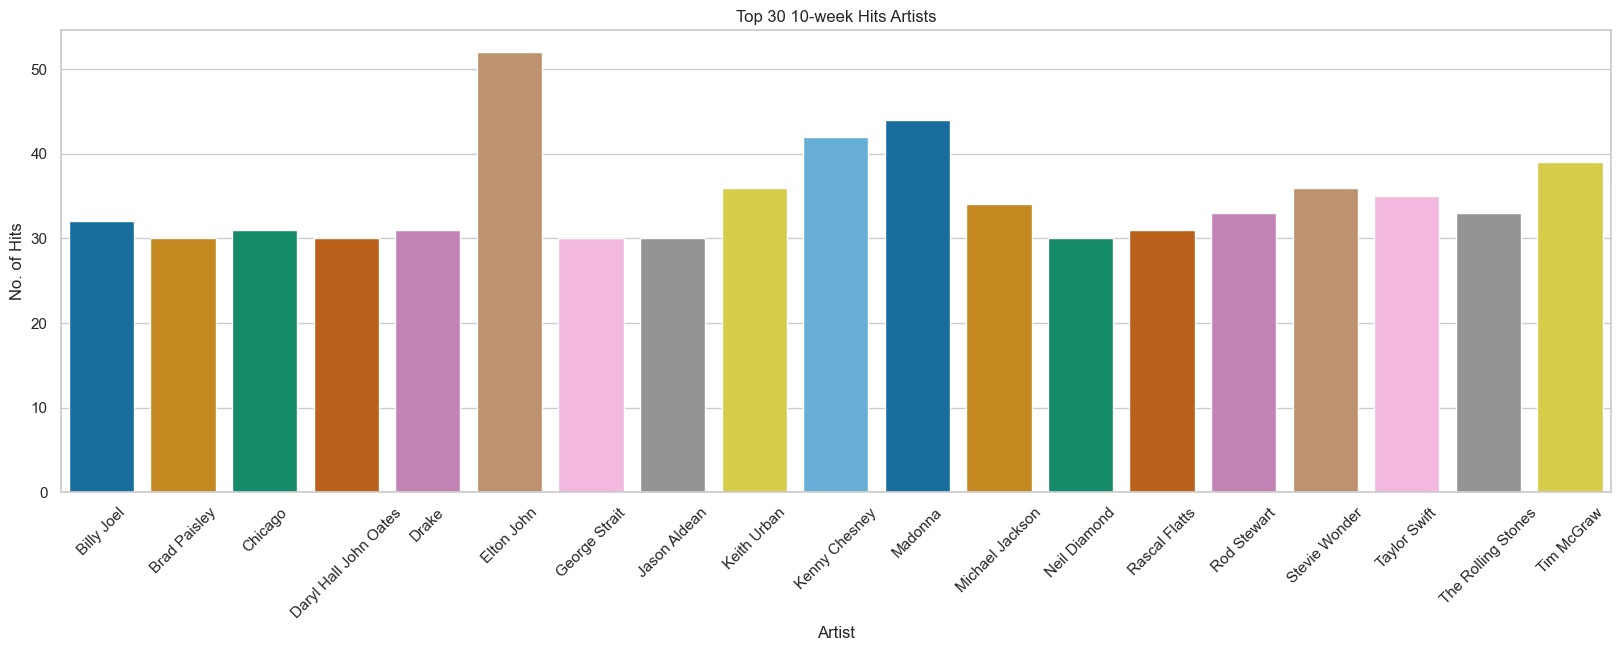

In [5]:
#Get songs that were on the chart for atleast 10 weeks
df_10_week = df[df['weeks_on_chart']>=10]

#Drop duplicates
df_10_week.drop_duplicates(subset=['performer','song'], inplace=True)

#Group the songs by performer
ten_week_artist = df_10_week.groupby('performer')['song'].count()

#Get artists with atleast 30 songs
ten_week_artist = ten_week_artist[ten_week_artist >= 30]
ten_week_artist

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x=ten_week_artist.index, y=ten_week_artist.values, palette="colorblind")

# Add labels and title
plt.xlabel("Artist")
plt.ylabel("No. of Hits")
plt.title("Top 30 10-week Hits Artists")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Here we have a bar plot of the 19 artists with atleast 30 'ten week hit' songs